# Inferencia Variacional

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/6/60/CAVI_algorithm_explain.jpg" width="500px" height="300px" />

> En lo que resta de este módulo vamos a ver cómo encontrar distribuciones posteriores de manera aproximada. En este notebook motivaremos esta idea.

> **Objetivos:**
> - Motivar la necesidad de hacer inferencia aproximada.
> - Comprender intuitivamente el concepto de inferencia variacional.

> **Referencias:**
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

## 1. ¿Por qué inferencia aproximada?

Hasta ahora vimos cómo encontrar distribuciones posteriores de manera analítica (primer módulo).

Recordamos que la distribución posterior es:

$$
p^*(z) = p(z | X) = \frac{p(X | z) p(z)}{p(X)},
$$

donde $X$ son nuestros datos.

Sabemos que cuando podemos elegir una previa conjugada, encontrar la distribución posterior es fácil. De otro modo, es una tarea **bastante compleja, pues tenemos que calcular la distribución de evidencia**.

De modo que en casos donde no podemos encontrar la distribución posterior de manera analítica, debemos hacerlo de forma aproximada.

**¿Qué tan bueno es eso?**

Supongamos que tenemos la siguiente distribución:

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
def rare_pdf(x):
    return 0.25 * norm.pdf(x, loc=-2, scale=0.8) + 0.5 * norm.pdf(x, loc=0, scale=1) + 0.25 * norm.pdf(x, loc=2, scale=1.3)

In [3]:
x = np.linspace(-6, 6, 101)

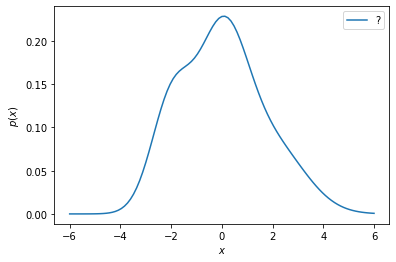

In [4]:
plt.plot(x, rare_pdf(x), label="?")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

Al observar esta distribución nos podríamos plantear aproximarla con una distribución normal:

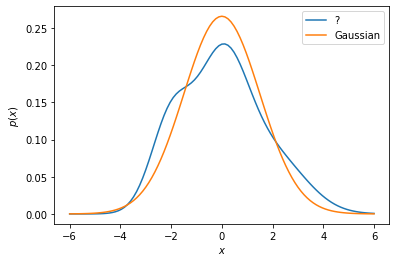

In [5]:
plt.plot(x, rare_pdf(x), label="?")
plt.plot(x, norm.pdf(x, loc=0, scale=1.5), label="Gaussian")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

Esta distribución normal captura correctamente los estadísticos de media, varianza y moda, además de su forma. Como resultado, esta aproximación será bastante buena para **muchas aplicaciones prácticas**.

Veremos en este tema un método para encontrar **la mejor aproximación** de la distribución posterior sobre una familia de distribuciones.

## 2. Inferencia variacional - Intuición

A grandes rasgos, el método de inferencia variacional sigue los siguientes pasos:

1. Seleccionar una familia de distribuciones variacionales $Q$. Ejemplos:

   - Distribuciones $\delta$.
   - Distribuciones $\mathcal{N}(\mu, \text{diag}(\sigma_1^2, \dots, \sigma_2^2))$
   
2. Encontrar la mejor aproximación $q \in Q$ de la distribución posterior $p^*(z)$. ¿Cómo?

   $$
   \min_{q \in Q} \mathcal{KL}(q(z) || p^*(z)).
   $$

**¿Qué tan buena será la aproximación?**

> Eso dependerá de la flexibilidad de la familia de distribuciones $Q$. (ver en el pizarrón)

> Sin embargo para familias muy flexibles, encontrar la aproximación será bastante complejo.

**¿Y cómo le hacemos con la distribución de evidencia $p(X)$?**

Recordemos que la distribución posterior es:

$$
p^*(z) = p(z | X) = \frac{p(X | z) p(z)}{p(X)}.
$$

Como la distribución posterior es una distribución sobre $z$, podemos interpretar la evidencia como una constante de normalización:

$$
p^*(z) = \frac{p(X | z) p(z)}{p(X)} = \frac{\hat{p}(z)}{Z}.
$$

Notemos que:

\begin{align}
\mathcal{KL}(q(z) || p^*(z)) & = \mathbb{E}_q \left[\log \frac{q(z)}{p^*(z)}\right] \\
                             & = \mathbb{E}_q \left[\log \frac{q(z)Z}{\hat{p}(z)}\right] \\
                             & = \underbrace{\mathbb{E}_q \left[\log \frac{q(z)}{\hat{p}(z)}\right]}_{\mathcal{KL}(q(z) || \hat{p}(z))} + \underbrace{\mathbb{E}_q \left[\log Z\right]}_{Z}, \\
\end{align}

de modo que:

$$
\arg \min_{q \in Q} \mathcal{KL}(q(z) || p^*(z)) = \arg \min_{q \in Q} \mathcal{KL}(q(z) || \hat{p}(z)).
$$

## 3. Aproximación campo media

Este es un tipo especial de inferencia variacional, donde la familia de distribuciones es un producto de distribuciones sobre cada variable.

1. Seleccionar una familia de distribuciones variacionales $Q$:

   $$
   Q = \left\{q: q(z) = \prod_{i=1}^{d} q_i(z_i)\right\},
   $$
   
   La familia de distribuciones es de la forma "producto de distribuciones individuales sobre cada variable latente".
   
2. Encontrar la mejor aproximación $q \in Q$ de la distribución posterior $p^*(z)$. ¿Cómo?

   $$
   \min_{q \in Q} \mathcal{KL}(q(z) || p^*(z)).
   $$

**Ejemplo:**

Queremos aproximar la distribución posterior $p^*(z_1, z_2)$ como:

$$
p^*(z_1, z_2) \approx q_1(z_1) q_2(z_2)
$$

Supongamos que la distribución posterior es de la forma $p^*(z_1, z_2) = \mathcal{N}(z | 0, \Sigma)$:

In [6]:
from scipy.stats import multivariate_normal

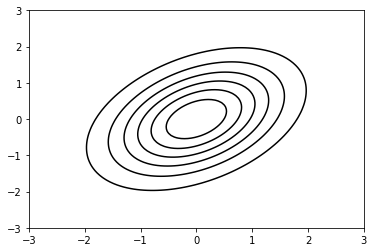

In [7]:
# Posterior
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
z = multivariate_normal.pdf(np.dstack([x, y]),
                            mean=[0, 0],
                            cov=[[1, 0.4],
                                 [0.4, 1]])

plt.contour(x, y, z, colors="black")

Podemos aproximar esta distribución con distribuciones normales univariadas de la forma: $q_1(z_1) = \mathcal{N}(z_1 | 0, \sigma_1^2)$, y $q_2(z_2) = \mathcal{N}(z_2 | 0, \sigma_2^2)$, con lo cual

$$
q_1(z_1)q_2(z_2) = \mathcal{N}(z | 0, \text{diag}(\sigma_1^2, \sigma_2^2))
$$

In [8]:
from matplotlib.lines import Line2D

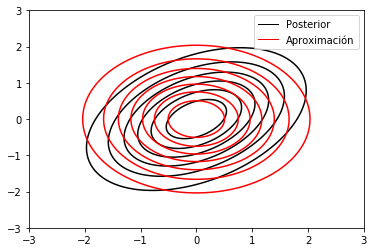

In [9]:
# Aproximación campo media
z2 = multivariate_normal.pdf(np.dstack([x, y]),
                             mean=[0, 0],
                             cov=[[1, 0],
                                  [0, 1]])

plt.contour(x, y, z, colors="black")
plt.contour(x, y, z2, colors="red")

patches = [Line2D([0], [0], color='k', lw=1, label='Posterior'),
           Line2D([0], [0], color='r', lw=1, label='Aproximación')]

plt.legend(handles=patches)

**¿Cómo lo hacemos?**

$$
\min_{q \in Q} \mathcal{KL}(q(z) || p^*(z)) = \min_{q_1, \dots, q_d} \mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right)
$$

La idea es minimizar paso a paso respecto a cada distribución individual, es decir:

1. $\min_{q_1} \mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right)$

2. $\min_{q_2} \mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right)$

3. ...

De manera que queremos encontrar el mínimo de:

$$
\min_{q_k} \mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right),
$$

donde

\begin{align}
\mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right) & = \int \prod_{i=1}^{d} q_i(z_i) \log \frac{\prod_{j=1}^{d} q_i(z_i)}{p^*(z)} dz \\
& = \sum_{j=1}^{d} \int \prod_{i=1}^{d} q_i(z_i) \log q_j(z_j) dz - \int \prod_{i=1}^{d} q_i(z_i) \log p^*(z) dz \\
& = \int \prod_{i=1}^{d} q_i(z_i) \log q_k(z_k) dz + \sum_{j \neq k} \int \prod_{i=1}^{d} q_i(z_i) \log q_j(z_j) dz - \int \prod_{i=1}^{d} q_i(z_i) \log p^*(z) dz \\
& = \int q_k(z_k) \log q_k(z_k) \underbrace{\left[\int \prod_{i \neq k} q_i(z_i) dz_{\neq k}\right]}_{1} dz_k + \underbrace{\sum_{j \neq k} \int \prod_{i=1}^{d} q_i(z_i) \log q_j(z_j) dz}_{const.} - \int \prod_{i=1}^{d} q_i(z_i) \log p^*(z) dz \\
& = \int q_k(z_k) \log q_k(z_k) dz_k - \int q_k(z_k) \left[\int \prod_{i \neq k} q_i(z_i) \log p^*(z) dz_{\neq k}\right] dz_k + const. \\
& = \int q_k(z_k) \left[\log q_k(z_k) - \underbrace{\int \prod_{i \neq k} q_i(z_i) \log p^*(z) dz_{\neq k}}_{\mathbb{E}_{q_{-k}}[\log p^*(z)] := h(z_k)}\right] dz_k + const. \\
\end{align}

Notemos que:

$$
h(z_k) = \log \underbrace{\frac{\exp\{h(z_k)\}}{\int \exp\{h(z_k) dz_k}}_{t(z_k)} + \log\int \exp\{h(z_k) dz_k.
$$

De esta manera:

\begin{align}
\mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right) & = \int q_k(z_k) \left[\log q_k(z_k) - \log t(z_k) dz_k\right] + const.
\\
& = \mathcal{KL}\left(\prod_{i=1}^{d} q_k(z_k) || t(z_k)\right) + const.
\end{align}

Finalmente, la distirbución individual $q_k$ que minimiza:

$$
\min_{q_k} \mathcal{KL}\left(\prod_{i=1}^{d} q_i(z_i) || p^*(z)\right),
$$

es:

\begin{align}
                & q_k(z_k) = t(z_k) \\
\Leftrightarrow & \log q_k(z_k) = \mathbb{E}_{q_{-k}}[\log p^*(z)] + const.
\end{align}

## 4. Aplicación: Modelo de Ising



El modelo de Ising es un modelo de física estadística, que representa de un sistema de átomos que interactúan entre sí. 

En este modelo, cada variable $y_i$ es una variable vinaria, cuyos valores definen la dirección de giro del átomo:

![img](figures/ising_model.png)

La energía asociada a un par de átomos conectados es:

$$J y_i y_j,$$

donde $J$ es un parámetro del material. Además, los átomos tienen su propio potencial:

$$b_i y_i.$$

Definimos la probabilidad conjunta sobre todos los nodos como:

$$
p(y) = \frac{1}{Z} \underbrace{\exp\left\{\frac{1}{2}J \sum_i \sum_{j\in \mathcal{N}(i)} y_i y_j + \sum_i b_i y_i\right\}}_{\phi(y)}.
$$

> El $\frac{1}{2}$ en el exponente es para remover el efecto de que los términos aparecen dos veces.

Este modelo puede codificar diferentes tipos de interacciones:

1. Si $J>0$, el material se conoce como ferromagnético, y favorece que los átomos giren en la misma dirección.

2. Si $J>0$, el material se conoce como antiferromagnético, y favorece que los átomos giren en direcciones opuestas.

**¿Qué pasa con $Z$?**

$Z$ es la constante de normalización definida como:

$$
Z = \sum_{y} \phi(y)
$$

¿Cuántos términos contiene esta suma? $2^{N^2} \Rightarrow$ Intratable.

Por tanto, aproximamos con **campo medio**:

$$
p(y) \approx \prod_i q_i(y_i)
$$

De modo que queremos encontrar $q_k(y_k)$:

![img](figures/atom.png)

Sabemos que:

\begin{align}
\log q_k(y_k) & = \mathbb{E}_{q_{-k}} \log p(y) + const. \\
              & = \mathbb{E}_{q_{-k}} \frac{1}{2}J \sum_i \sum_{j\in \mathcal{N}(i)} y_i y_j + \sum_i b_i y_i + const. \\
              & = \mathbb{E}_{q_{-k}} J \sum_{j\in \mathcal{N}(k)} y_k y_j + b_k y_k + const. \\
              & = J \sum_{j\in \mathcal{N}(k)} y_k \underbrace{\mathbb{E} y_j}_{\mu_j} + b_k y_k + const. \\
              & = y_k \left(J \sum_{j\in \mathcal{N}(k)}\mu_j + b_k \right) + const. \\
\end{align}

De donde:

$$
q_k(y_k) = C \exp(y_k M_k),
$$

donde $M_k = J \sum_{j\in \mathcal{N}(k)}\mu_j + b_k$.

Para calcular la constante $C$, recordamos que $q_k(+1) + q_k(-1) = 1$, y así:

$$
C \exp(M_k) + C \exp(-M_k) = 1 \Rightarrow C = \frac{1}{\exp(M_k) + \exp(-M_k)}
$$

Finalmente:

$$
q_k(y_k) = \frac{\exp(y_k M_k)}{\exp(M_k) + \exp(-M_k)},
$$

es decir:

$$
q_k(+1) = \frac{\exp(M_k)}{\exp(M_k) + \exp(-M_k)} = \frac{1}{1 + \exp(-2M_k)} = \sigma(2M_k).
$$

Adicionalmente,

$$
\mu_k = q_k(+1) - q_k(-1) = \frac{\exp(M_k) - \exp(-M_k)}{\exp(M_k) + \exp(-M_k)} = \tanh(M_k)
$$

## 5. Ejemplo

Simulación del modelo de Ising con campos externos:

In [10]:
N = 40
B = np.zeros((N, N))
i = np.arange(N)
j = np.arange(N)
I, J = np.meshgrid(i, j)

In [11]:
B[(I - 10)**2 + (J - 10)**2 <= 49] = 1
B[(I - 30)**2 + (J - 30)**2 <= 49] = -1

In [12]:
from matplotlib import pyplot as plt

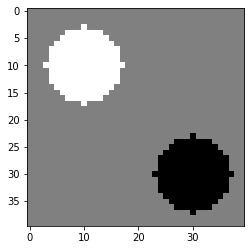

In [13]:
plt.imshow(B, cmap="gray")

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def ising_mean_field(J, B, n_iter=100):
    Q = np.zeros(B.shape)
    for _ in range(n_iter):
        mu = Q - (1 - Q)
        for i in range(N):
            for j in range(N):
                # Determine neighbors
                if 0 < i < N - 1:
                    nb = [(i - 1, j), (i + 1, j)]
                elif i == 0:
                    nb = [(i + 1, j)]
                elif i == N - 1:
                    nb = [(i - 1, j)]
                if 0 < j < N - 1:
                    nb.extend([(i, j - 1), (i, j + 1)])
                elif j == 0:
                    nb.extend([(i, j + 1)])
                elif j == N - 1:
                    nb.extend([(i, j - 1)])
                nb = (tuple(x[0] for x in nb), tuple(x[1] for x in nb))

                Mk = J * mu[nb].sum() + B[i, j]
                Q[i, j] = sigmoid(2 * Mk)

    return Q

#### ¿Qué pasa para diferentes valores de $J$?

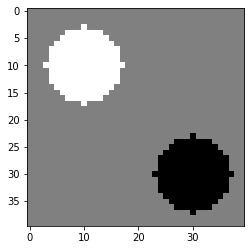

In [16]:
J = 0
n_iter = 200
Q = ising_mean_field(J, B, n_iter)
plt.imshow(Q, cmap="gray")

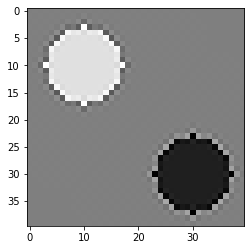

In [17]:
J = -0.15
n_iter = 200
Q = ising_mean_field(J, B, n_iter)
plt.imshow(Q, cmap="gray")

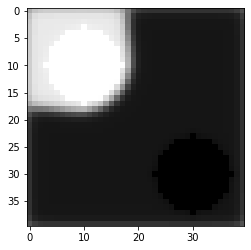

In [18]:
J = 0.35
n_iter = 200
Q = ising_mean_field(J, B, n_iter)
plt.imshow(Q, cmap="gray")

**La última gráfica se ve extraña.**

Nuestra configuración está sujeta a campos externos de igual magnitud, y no se obtiene una distribución de cargas simétrica. 

**¿Porqué?**

En realidad es una propiedad de la divergencia $\mathcal{KL}$.

### La divergencia $\mathcal{KL}$ promueve el cero

Esta es una propiedad importante, que resulta útil en varias aplicaciones. ¿De qué se trata?

Supongamos que queremos estimar la siguiente distribución con una normal:

No handles with labels found to put in legend.


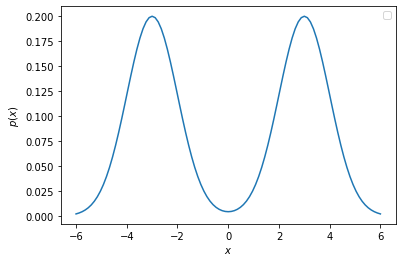

In [24]:
x = np.linspace(-6, 6, 101)
plt.plot(x, 0.5 * norm.pdf(x, loc=-3, scale=1) + 0.5 * norm.pdf(x, loc=3, scale=1))
plt.xlabel("$x$")
plt.ylabel("$p(x)$")

¿Cuál de las siguientes distribuciones creen que minimiza la divergencia $\mathcal{KL}$?

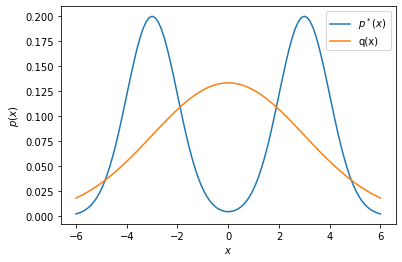

In [28]:
x = np.linspace(-6, 6, 101)
plt.plot(x, 0.5 * norm.pdf(x, loc=-3, scale=1) + 0.5 * norm.pdf(x, loc=3, scale=1), label="$p^*(x)$")
plt.plot(x, norm.pdf(x, loc=0, scale=3), label="$q(x)$")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

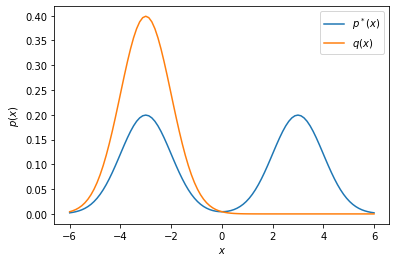

In [29]:
x = np.linspace(-6, 6, 101)
plt.plot(x, 0.5 * norm.pdf(x, loc=-3, scale=1) + 0.5 * norm.pdf(x, loc=3, scale=1), label="$p^*(x)$")
plt.plot(x, norm.pdf(x, loc=-3, scale=1), label="$q(x)$")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

**Pista.** Recordar la definición de divergencia $\mathcal{KL}$.

$$
\mathcal{KL}(q || p^*) = \int_{-\infty}^{\infty} q(x) \log \frac{q(x)}{p^*(x)} d x
$$

¿Qué sucede si para algún valor $p^*(x) = 0$ y $q(x) \neq 0$?

## 6. Algoritmo de ME variacional

**Recorderis: Algoritmo de ME**

Cambiamos el problema de $\max_{\theta} \log p(X | \theta)$ por maximizar la cota variacional $\mathcal{L}(q, \theta)$:

$$
\log p(X | \theta) \geq \mathcal{L}(q, \theta) = \sum_{i=1}^{N}\mathbb{E}_q\left[ \log\frac{p(x_i, t_i| \theta)}{q(t_i=c)} \right].
$$

En dos pasos:

1. E-step

   $$
   q^{j+1} = \arg \max_{q} \mathcal{L}(q, \theta^j) = \arg \min_{q} \sum_{i=1}^{N} \mathcal{KL}(q(t_i) || p(t_i|x_i, \theta))
   $$
   
2. M-step

   $$
   \theta^{j+1} = \arg \max_{\theta} \sum_{i=1}^{N} \mathbb{E}_{q^{j+1}(t_i)} \left[\log p(x_i, t_i| \theta)\right]
   $$

En efecto, si podemos elegir cualquier distribución $q$ podemos tomar la distribución posterior completa (inferencia exacta) en el E-step.

$$
q^{j+1}(t_i) = p(t_i|x_i, \theta^j),
$$

Sin embargo, este no es siempre el caso, y a veces nos debemos restringir a un subconjunto de distribuciones variacionales $Q$:

$$
q^{j+1} = \arg \min_{q \in Q} \sum_{i=1}^{N} \mathcal{KL}(q(t_i) || p(t_i|x_i, \theta)).
$$

Cuando esto sucede, llamamos al algoritmo de ME, **algoritmo de ME variacional** (recordar K-Means).

## 7. En resumen ...

Tenemos varias maneras de hacer inferencia de la distribución posterior de acuerdo a nuestras necesidades:

1. Inferencia completa: cálculo exacto de $p(T, \theta | X)$.
2. Aproximación campo media: $p(T, \theta | X) \approx q(T) q(\theta)$.
3. Algoritmo ME: $q(T)$ y $\theta = \theta_{ML}$.
4. ME variacional: $q_1(T_1) \cdot \dots \cdot q_d(T_d)$ y $\theta = \theta_{ML}$.

Mientras más abajo nos vamos, tenemos algoritmos más rápidos, pero menos precisos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>